<a href="https://colab.research.google.com/github/E1250/udl-ref/blob/main/ch13/13_4_Graph_Attention_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 13.4: Graph attention networks**

This notebook builds a graph attention mechanism from scratch, as discussed in section 13.8.6 of the book and illustrated in figure 13.12c

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

The self-attention mechanism maps $N$ inputs $\mathbf{x}_{n}\in\mathbb{R}^{D}$ and returns $N$ outputs $\mathbf{x}'_{n}\in \mathbb{R}^{D}$.  



In [2]:
# Set seed so we get the same random numbers
np.random.seed(1)
# Number of nodes in the graph
N = 8
# Number of dimensions of each input
D = 4

# Define a graph
A = np.array([[0,1,0,1,0,0,0,0],
              [1,0,1,1,1,0,0,0],
              [0,1,0,0,1,0,0,0],
              [1,1,0,0,1,0,0,0],
              [0,1,1,1,0,1,0,1],
              [0,0,0,0,1,0,1,1],
              [0,0,0,0,0,1,0,0],
              [0,0,0,0,1,1,0,0]]);
print(A)

# Let's also define some random data
X = np.random.normal(size=(D,N))

[[0 1 0 1 0 0 0 0]
 [1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [1 1 0 0 1 0 0 0]
 [0 1 1 1 0 1 0 1]
 [0 0 0 0 1 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 1 0 0]]


We'll also need the weights and biases for the keys, queries, and values (equations 12.2 and 12.4)

$$
v_m = \beta_v + \Omega_v x_m
$$

$$
q_n = \beta_q + \Omega_q x_n
$$

$$
k_m = \beta_k + \Omega_k x_m
$$

In [3]:
# Choose random values for the parameters
omega = np.random.normal(size=(D,D))
beta = np.random.normal(size=(D,1))
phi = np.random.normal(size=(1,2*D))

We'll need a softmax operation that operates on the columns of the matrix and a ReLU function as well

In [4]:
# Define softmax operation that works independently on each column
def softmax_cols(data_in):
  # Exponentiate all of the values
  exp_values = np.exp(data_in) ;
  # Sum over columns
  denom = np.sum(exp_values, axis = 0);
  # Replicate denominator to N rows
  denom = np.matmul(np.ones((data_in.shape[0],1)), denom[np.newaxis,:])
  # Compute softmax
  softmax = exp_values / denom
  # return the answer
  return softmax


# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

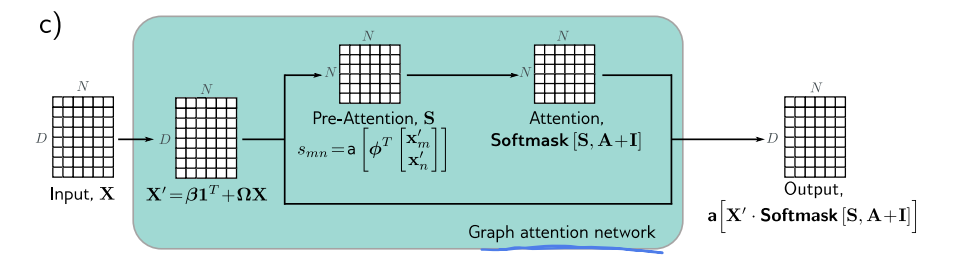

In [45]:
 # Now let's compute self attention in matrix form
def graph_attention(X,omega, beta, phi, A):
  # TODO -- Write this function (see figure 13.12c)
  # 1. Compute X_prime
  X_prime = np.dot(omega, X) + beta  # Linear transformation of the input features

  # 2. Compute S using phi
  # Reshape phi to match dimensions for broadcasting
  phi_transformed = np.dot(X_prime, phi.T)  # Apply phi
  S = np.dot(X_prime.T, X_prime) + phi_transformed  # Combine the features for attention scores

  # 3. Apply the mask
  mask = A + np.eye(N)
  S = np.where(mask == 0, -1e20, S)  # Set S to a large negative number where A + I is zero

  # 4. Run the softmax function to compute the attention values
  attention_weights = softmax_cols(S)

  # 5. Postmultiply X' by the attention values
  output = np.dot(attention_weights, X_prime.T).T  # Weighted combination of X_prime

  # 6. Apply the ReLU function
  output = ReLU(output)  # Apply ReLU to the output

  return output;

In [46]:
# Test out the graph attention mechanism
np.set_printoptions(precision=3)
output = graph_attention(X, omega, beta, phi, A);
print("Correct answer is:")
print("[[0.    0.028 0.37  0.    0.97  0.    0.    0.698]")
print(" [0.    0.    0.    0.    1.184 0.    2.654 0.  ]")
print(" [1.13  0.564 0.    1.298 0.268 0.    0.    0.779]")
print(" [0.825 0.    0.    1.175 0.    0.    0.    0.  ]]]")


print("Your answer is:")
print(output)

ValueError: operands could not be broadcast together with shapes (8,8) (4,1) 

TODO -- Try to construct a dot-product self-attention mechanism as in practical 12.1 that respects the geometry of the graph and has zero attention between non-neighboring nodes by combining figures 13.12a and 13.12b.
